In [ ]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("sentiment140.csv", encoding="latin-1", header=None)
df.columns = ["sentiment", "id", "date", "query", "user", "text"]
df = df[["sentiment", "text"]]

# Convert sentiment labels (0 = Negative, 4 = Positive)
df["sentiment"] = df["sentiment"].map({0: 0, 4: 1})

# Remove missing values
df = df.dropna()
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")
df = df.dropna().astype({"sentiment": int})  

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"[^a-zA-Z ]", "", text)  
    return text

df["cleaned_text"] = df["text"].apply(clean_text)

# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["sentiment"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "Naïve Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')  
}

# Train models and store accuracies
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Select best model (highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Save best model & vectorizer with correct filenames
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:  
    pickle.dump(vectorizer, f)

print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.7778
Random Forest Accuracy: 0.7222
SVM Accuracy: 0.7639
Naïve Bayes Accuracy: 0.7778
Gradient Boosting Accuracy: 0.6944
XGBoost Accuracy: 0.6250
Best Model: Logistic Regression with accuracy 0.7778


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


with open("sentiment_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as sentiment_model.pkl")

Model saved as sentiment_model.pkl


In [6]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("sentiment140.csv", encoding="latin-1", header=None)
df.columns = ["sentiment", "id", "date", "query", "user", "text"]
df = df[["sentiment", "text"]]

# Convert sentiment labels (0 = Negative, 4 = Positive)
df["sentiment"] = df["sentiment"].map({0: 0, 4: 1})

# Remove missing values
df = df.dropna()
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")
df = df.dropna().astype({"sentiment": int})  

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"[^a-zA-Z ]", "", text)  
    return text

df["cleaned_text"] = df["text"].apply(clean_text)

# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["sentiment"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear'),
    "Naïve Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')  
}

# Train models and store accuracies
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Select best model (highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Logistic Regression Accuracy: 0.7778
Random Forest Accuracy: 0.7083
SVM Accuracy: 0.7639
Naïve Bayes Accuracy: 0.7778
Gradient Boosting Accuracy: 0.6944
XGBoost Accuracy: 0.6250
Best Model: Logistic Regression with accuracy 0.7778


C:\Users\DELL\AppData\Local\Temp\ipykernel_9988\3736773102.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


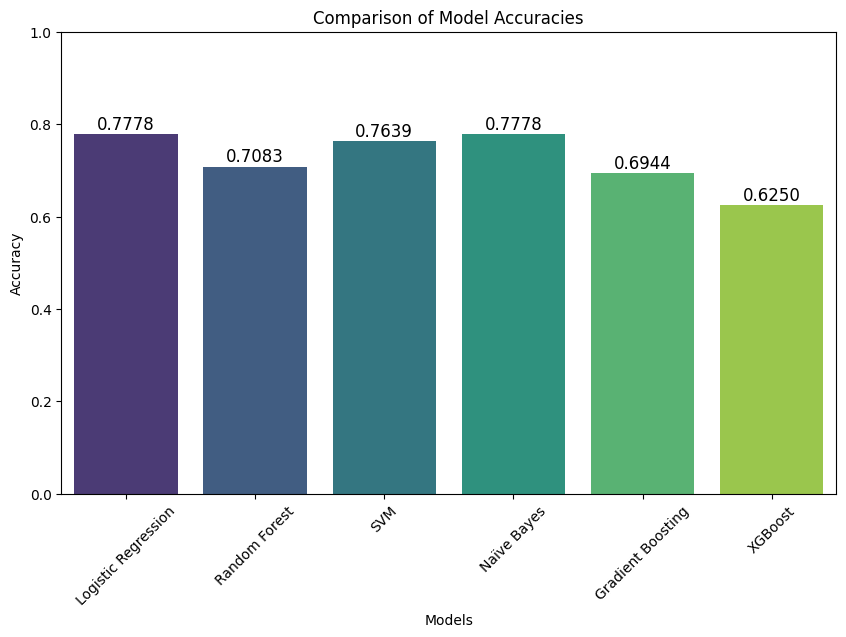

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Plot the accuracy of each model (Swapped Axes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

# Add title and labels
plt.ylabel("Accuracy")  # Now y-axis represents accuracy
plt.xlabel("Models")    # x-axis represents model names
plt.title("Comparison of Model Accuracies")

# Show accuracy values on bars
for index, value in enumerate(results_df["Accuracy"]):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center', fontsize=12)

plt.ylim(0, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()
